<a href="https://colab.research.google.com/github/brranitha/ML-Models/blob/main/Ionosphere_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay,roc_curve,auc

In [11]:
# load the data
ions_data = pd.read_csv('/content/Ionosphere.csv')

In [12]:
print(ions_data.columns)
print(ions_data.describe())
print(ions_data.info())
print(ions_data.shape)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'Class'],
      dtype='object')
               V1     V2          V3          V4  ...         V32         V33         V34       Class
count  351.000000  351.0  351.000000  351.000000  ...  351.000000  351.000000  351.000000  351.000000
mean     0.891738    0.0    0.641342    0.044372  ...   -0.003794    0.349364    0.014480    0.641026
std      0.311155    0.0    0.497708    0.441435  ...    0.513574    0.522663    0.468337    0.480384
min      0.000000    0.0   -1.000000   -1.000000  ...   -1.000000   -1.000000   -1.000000    0.000000
25%      1.000000    0.0    0.472135   -0.064735  ...   -0.242595    0.000000   -0.165350    0.000000
50%      1.000000    0.0    0.871110    0.016310  ...    0.000000    0.409560    0.000000    1.0000

In [13]:
ions_data.isnull().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [16]:
ions_data.corr()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
V1,1.000000,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,0.034138,0.072216,0.102558,0.199230,0.113622,0.100474,0.057783,0.076019,0.200237,0.019230,0.173828,-0.153902,0.011772,-0.082586,0.016717,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788,0.465614
V3,0.302034,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,0.169981,0.217597,0.164550,0.198306,0.094301,0.221446,0.172002,0.285280,0.150800,0.149374,0.138065,0.250832,-0.012570,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584,0.519145
V4,-0.006529,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,0.315877,-0.149216,0.236604,-0.253150,0.185872,-0.251143,-0.147451,-0.332213,0.167244,-0.281084,-0.035401,-0.143719,0.164196,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608,0.125884
V5,0.156152,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,0.042896,0.482118,0.127217,0.398878,0.087992,0.277932,0.027588,0.221532,0.041959,0.326223,0.163663,0.502878,0.098274,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478,0.516477
V6,0.127606,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,0.163933,-0.307197,0.135206,-0.359342,0.157740,-0.316705,0.188073,-0.208571,-0.061261,-0.114966,-0.132422,-0.215778,-0.286541,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215,0.149099
V7,0.221867,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,-0.020395,0.631060,0.083657,0.615407,-0.021493,0.379737,0.115927,0.372572,0.158917,0.586627,0.190805,0.373186,0.112717,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460,0.450429
V8,0.027079,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,0.429146,-0.355875,0.253740,-0.352216,0.419673,-0.491863,0.068717,-0.400523,0.077624,-0.370473,-0.212007,-0.270624,0.007045,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610,0.207544
V9,0.189242,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,-0.167705,0.562072,-0.088988,0.618461,-0.032689,0.633574,0.200786,0.673490,0.067314,0.492411,0.237322,0.352218,0.161258,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597,0.294852
V10,-0.051883,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,0.441505,-0.406358,0.323813,-0.374908,0.334135,-0.392047,0.130752,-0.471665,-0.001418,-0.404818,-0.040414,-0.318463,0.101850,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104,0.120634
V11,0.034138,0.325016,-0.190090,0.449829,-0.291447,0.412876,-0.364003,0.670813,-0.337374,1.000000,-0.217968,0.619217,-0.216747,0.664243,-0.031705,0.748290,0.107085,0.590598,0.128132,0.518041,0.325267,0.561689,0.172768,0.365821,0.131849,0.292281,0.197369,0.396851,0.074600,0.294646,0.023922,0.339506,-0.152225,0.167908


In [15]:
ions_data.drop(columns=['V2'],axis=1,inplace=True)

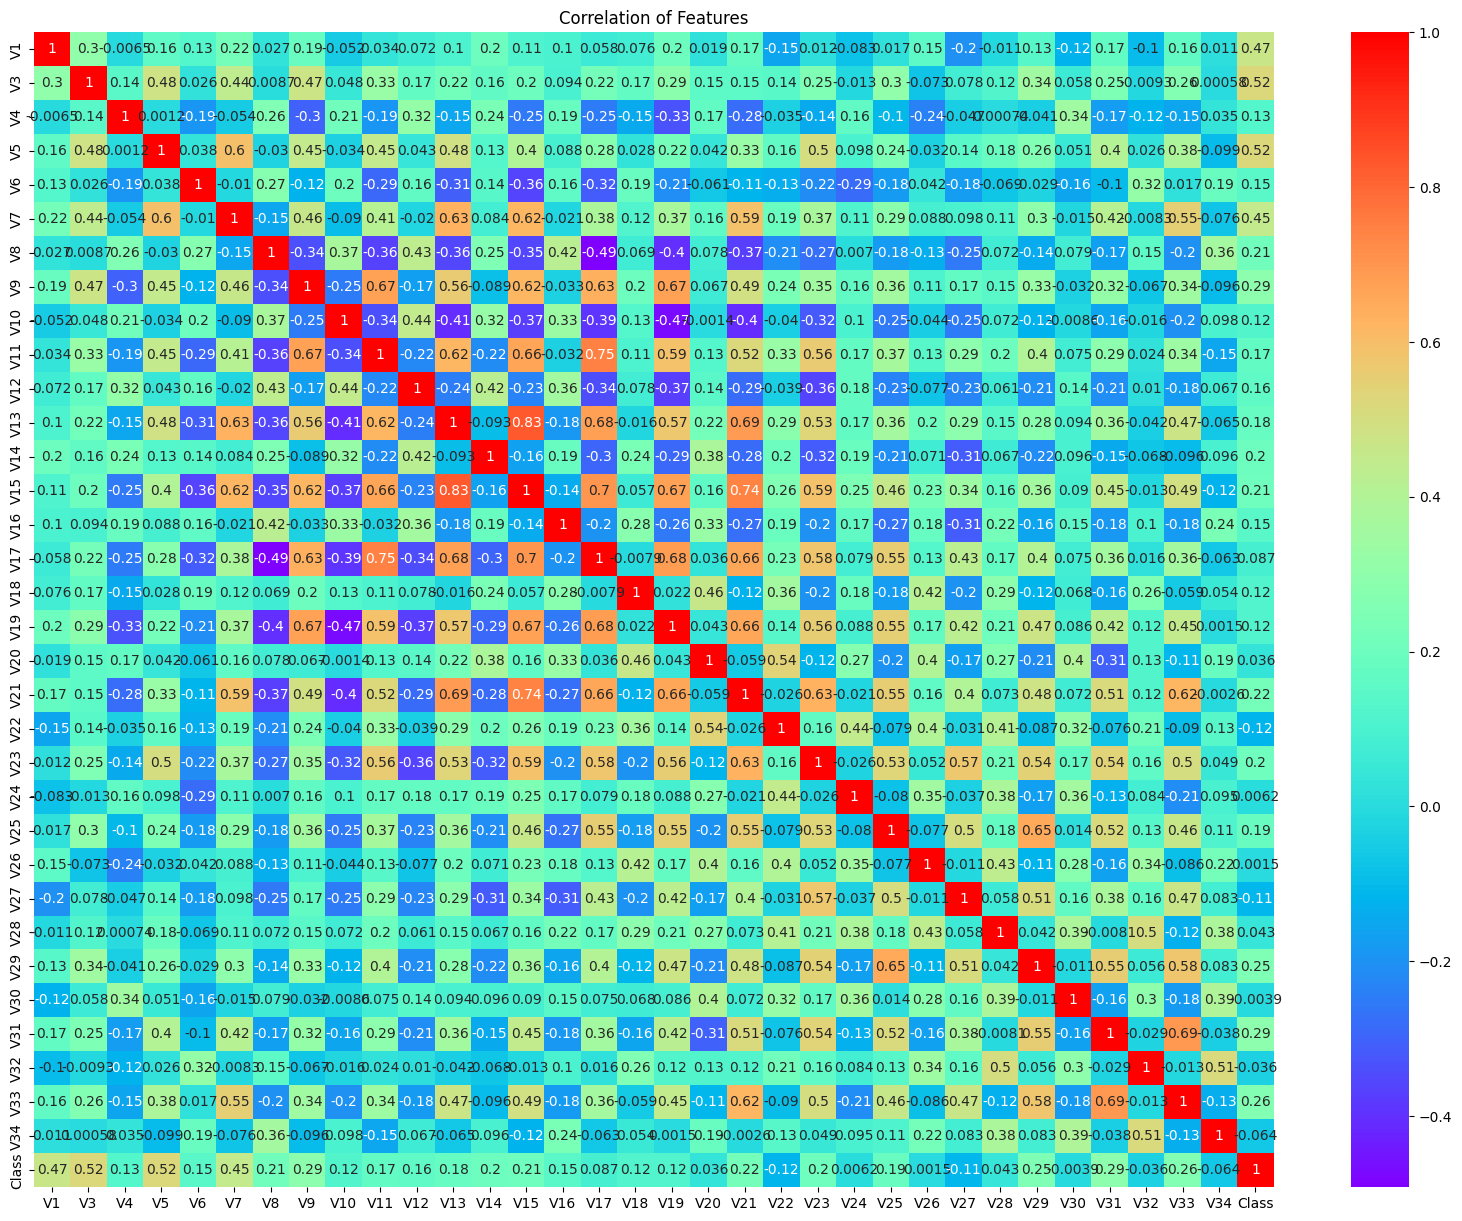

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(ions_data.corr(),annot=True,cmap='rainbow')
plt.title("Correlation of Features")
plt.show()

In [28]:
x = ions_data.drop(columns=['Class'],axis=1)
y = ions_data['Class']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'XGBoost':XGBClassifier(),
          'SVM':SVC(),
          'K-Nearest':KNeighborsClassifier(n_neighbors=3),
          'Gaussian':GaussianNB(),
          'AdaBoost':AdaBoostClassifier()}

In [34]:
model_test_score = {}
model_train_score = {}
for name,model in models.items():
  model.fit(x_train,y_train)
  model_test_score[name] = model.score(x_test,y_test)
  model_train_score[name] = model.score(x_train,y_train)


In [39]:
df = pd.DataFrame(model_test_score,index=['Test_Accuracy'])
df=df.transpose()
df['Train_Accuracy'] = model_train_score.values()
df['Difference'] = df['Train_Accuracy']-df['Test_Accuracy']
df

,Test_Accuracy,Train_Accuracy,Difference
LogisticRegression,0.859155,0.921429,0.062274
RandomForestClassifier,0.915493,1.000000,0.084507
DecisionTreeClassifier,0.873239,1.000000,0.126761
XGBoost,0.929577,1.000000,0.070423
SVM,0.929577,0.960714,0.031137
K-Nearest,0.830986,0.907143,0.076157
Gaussian,0.873239,0.896429,0.023189
AdaBoost,0.901408,0.985714,0.084306


<Axes: >

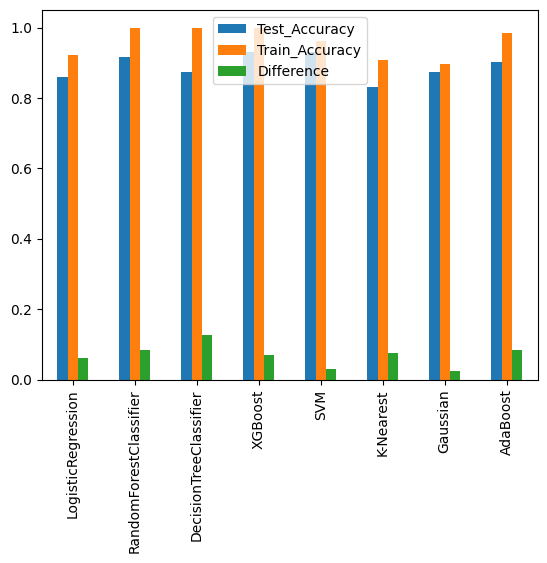

In [40]:
df.plot.bar()

In [42]:
#using Cross_validation for Logistic Regression - Accuracy
lr = LogisticRegression()
cv_acc = cross_val_score(lr,x,y,cv=10,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8604761904761906)

In [43]:
cv_pre = cross_val_score(lr,x,y,cv=10,scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

np.float64(0.8480875715988159)

In [45]:
cv_recall = cross_val_score(lr,x,y,cv=10,scoring='recall')
cv_recall= np.mean(cv_recall)
cv_recall

np.float64(0.9648221343873518)

In [46]:
cv_f1 = cross_val_score(lr,x,y,cv=10,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.900711967393281)

In [47]:
cv_metric = {'Accuracy':cv_acc,
             'Precision':cv_pre,
             'Recall':cv_recall,
             'F1':cv_f1}
cv_metric

{'Accuracy': np.float64(0.8604761904761906),
 'Precision': np.float64(0.8480875715988159),
 'Recall': np.float64(0.9648221343873518),
 'F1': np.float64(0.900711967393281)}

In [48]:
df_result = pd.DataFrame(cv_metric,index=['Result'])
df_result = df_result.T
df_result

,Result
Accuracy,0.860476
Precision,0.848088
Recall,0.964822
F1,0.900712


<Axes: >

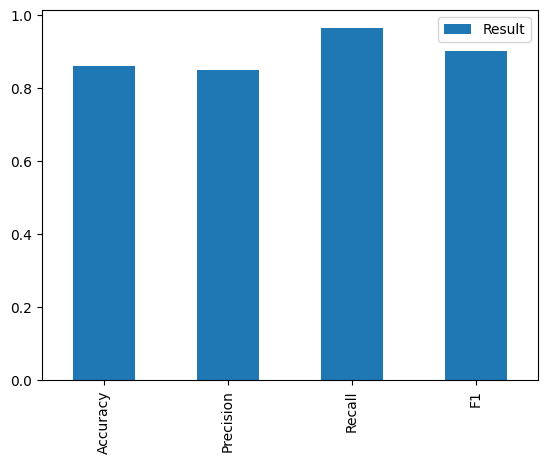

In [49]:
df_result.plot.bar()

In [52]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
diff = []
diff=y_pred-y_test
diff

,Class
157,0
342,0
316,0
234,1
155,0
...,...
181,0
179,0
199,0
327,0


In [51]:
ions_data['Class'].value_counts()

,count
Class,
1,225
0,126
